<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Naive Bayes Practice



---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

## Load the breast cancer data

In [82]:
data = load_breast_cancer()
X = data.data
y = data.target

## Do a train-test split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## Check the distribution of your features

This should inform you which Naive Bayes type you will need.

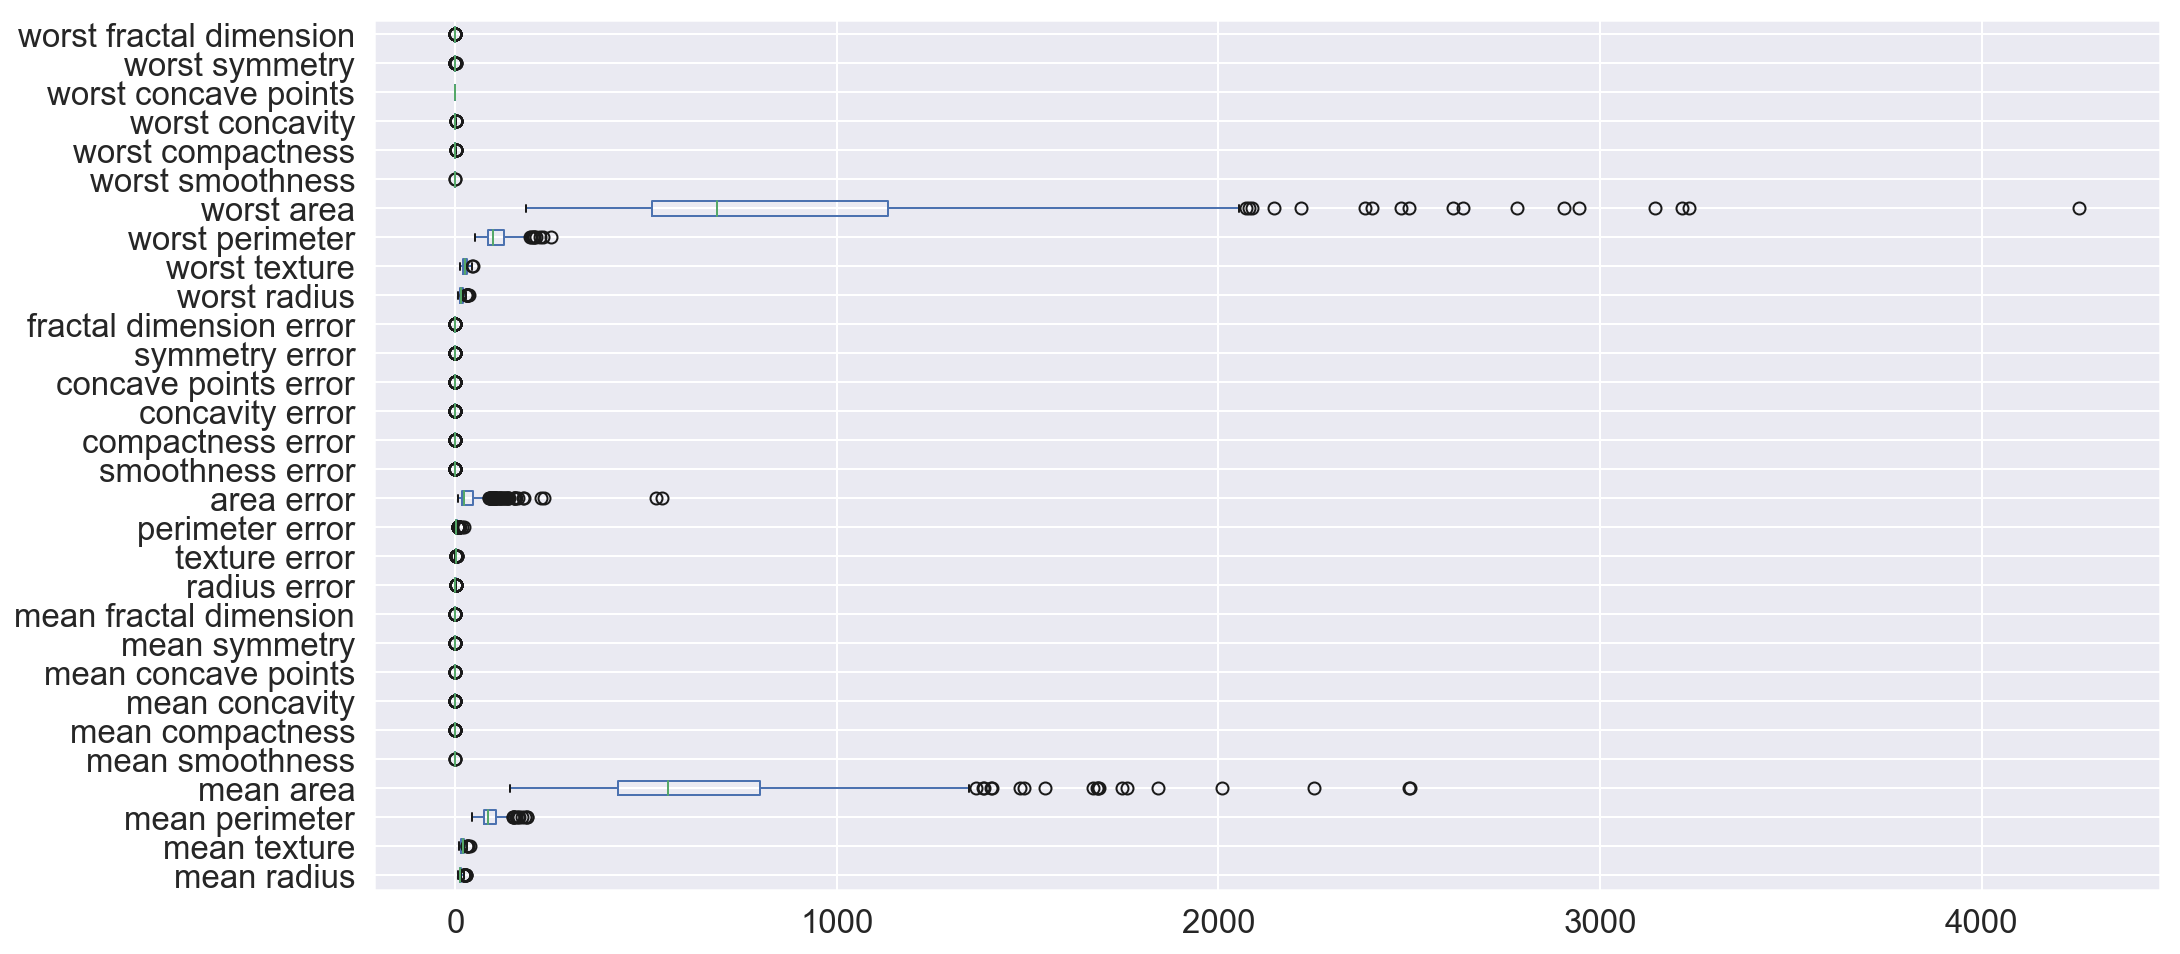

In [84]:
plt.figure(figsize=(16,8))
pd.DataFrame(X_train, columns=data.feature_names).boxplot(vert=False);

## Fit a naive Bayes model

Which type might be appropriate?

In [93]:
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)
print(cross_val_score(model, X_train, y_train, cv=5).mean())
print(model.score(X_test,y_test))

0.9459097127222982
0.9440559440559441


## Use the power transformer to obtain more normally distributed features

- [Scikit-Learn Power Transformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)

bscause as we saw above the variables aren't normally distributed...

In [86]:
from sklearn.preprocessing import PowerTransformer

In [94]:
pt = PowerTransformer(standardize=True)
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

## Fit the model on the transformed features

In [95]:
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)
print(cross_val_score(model, X_train, y_train, cv=5).mean())
print(model.score(X_test,y_test))

0.9482626538987688
0.9440559440559441


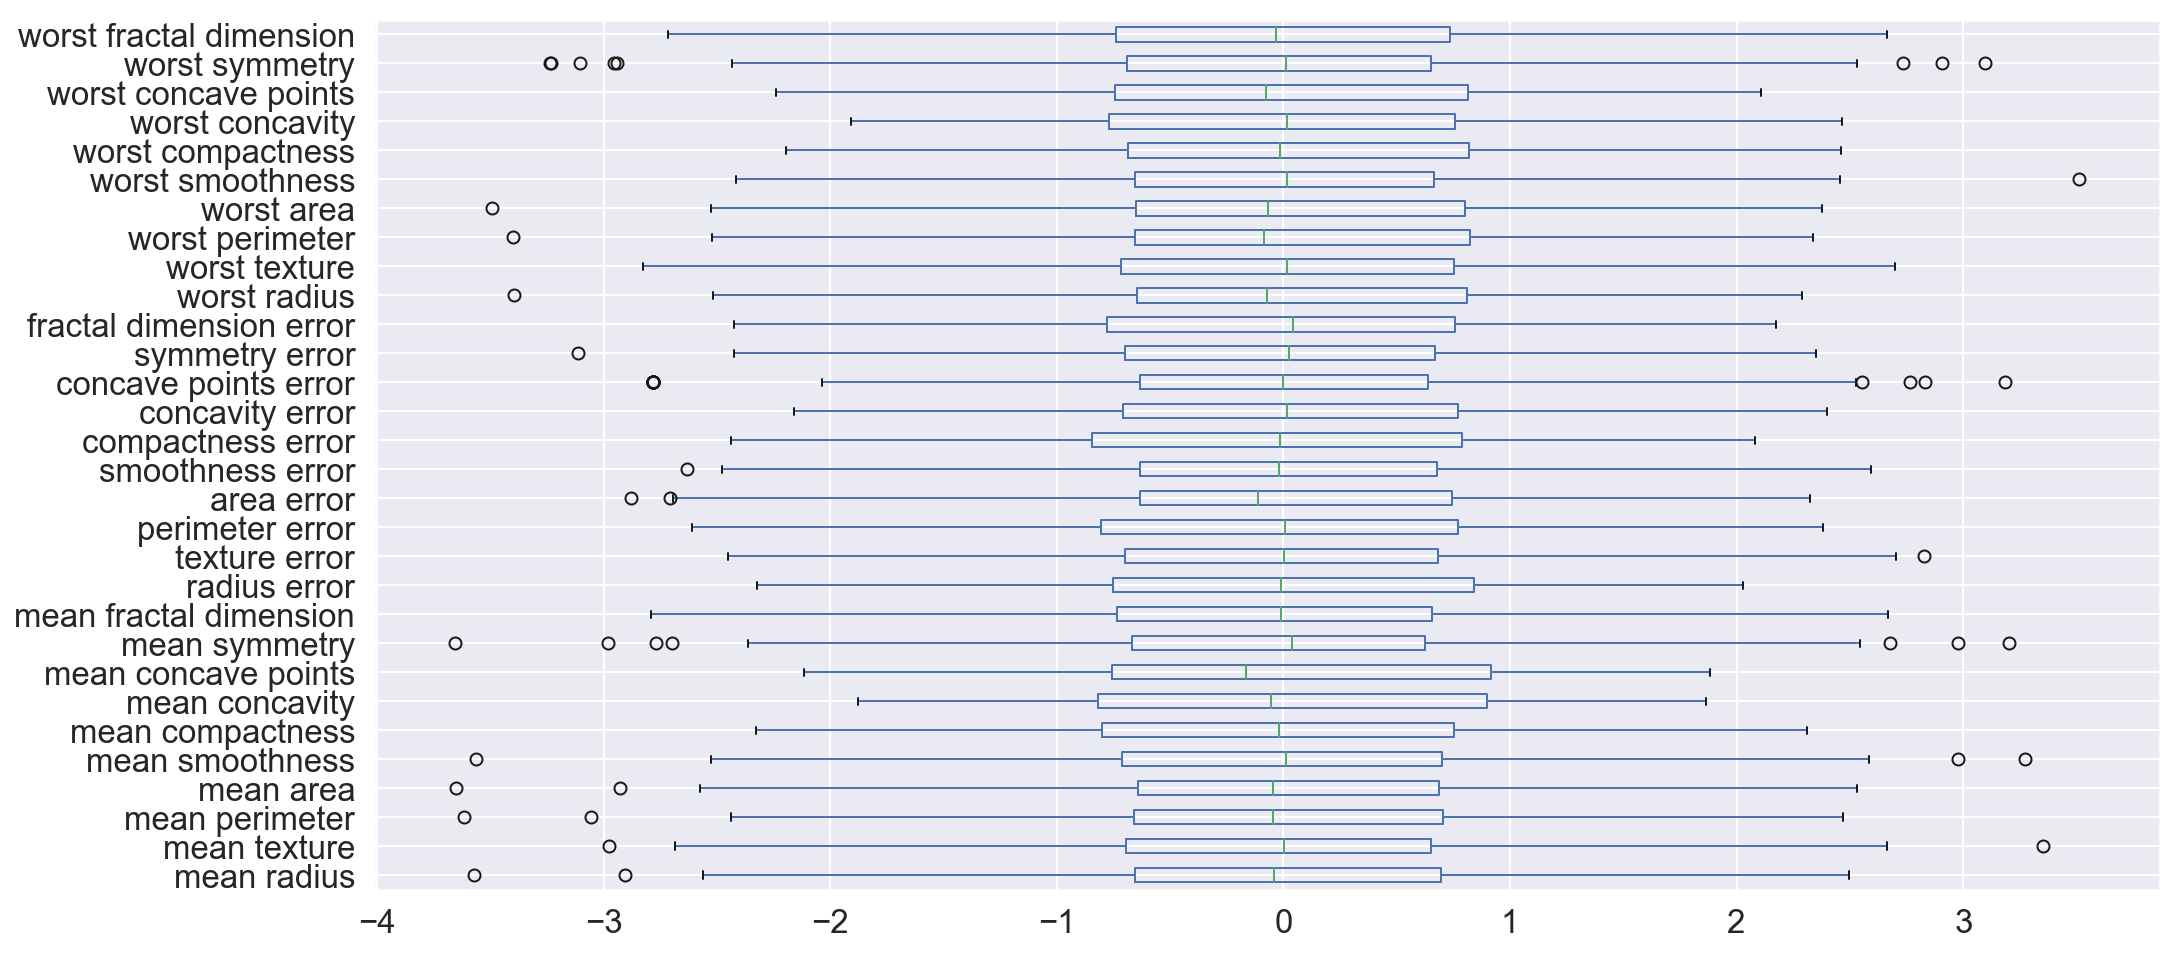

In [96]:
plt.figure(figsize=(16,8))
pd.DataFrame(X_train, columns=data.feature_names).boxplot(vert=False);